## **Employee Attrition Prediction Using Machine Learning Decision Trees**
Employee attrition refers to a gradual but deliberate reduction in staff numbers that occurs as employees leave a company and are not replaced.There are a number of reasons why employee attrition takes place and these include
unsatisfactory pay and/or benefits, lack of opportunity,poor workplace conditions, poor work-life balance among others.
This can lead to to increased costs for hiring and training of new employees for the company, as well as disruptions to productivity and team dynamics.
To ovecome this challenge we shall develop a model that can predict which employees are at a higher risk of leaving, which conditions could explain this risk, and what could be done to avoid their potential exit.


**Importing Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [45]:
#Importing the dataset and reading the first 2 rows
data = pd.read_csv("employee_attrition_dataset.csv")
#Display first 5 rows of dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [46]:
#checking rows and columns of data
data.shape

(1470, 35)

Initially the daset has 1470 rows and 35 columns

In [47]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Features Types**

**Categorical**
- Nominal - Attrition, BusinessTravel, Department, EducationField, Gender,JobRole, MaritalStatus, OverTime

- Ordinal - Education, EnvironmentSatisfaction, JobInvolvement, JobLevel,JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance
    
**Numerical**
           
  Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears,TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager

In [48]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [49]:
#Key statistics for numerical columns
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the key statistics we discover that
1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we can definitely drop it as well.
3. Column 'Over18' tells us every employee in this dataset is over 18 and we will drop it too.
4.Column 'EmployeeNumber' is a unique number representing an employee and we shall drop it

In [50]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber',],inplace=True)
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [51]:
#Checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [52]:
#Checking for null values
null_values = data.isnull().sum()
null_values.sum()


0

There are no null values observed

In [53]:
#check for duplicates
data.duplicated().value_counts()
data.drop_duplicates(inplace=True)
len(data)

1470

There no duplicates found

**Distribution of target varaible**

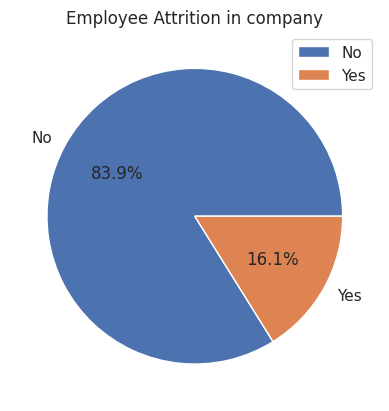

In [54]:
#Checking the distribution of the target variable using a pie chart
L = data['Attrition'].value_counts()
plt.pie(L, labels= L.index, autopct = '%1.1f%%')
plt.title('Employee Attrition in company')
plt.legend(labels=L.index, loc='upper right')
plt.show()

The distribution of the target variable appears to be imbalanced. 83.9% of the employees decide to stay and 16.1% employees leave.

 Frequency Analysis of Numerical Data

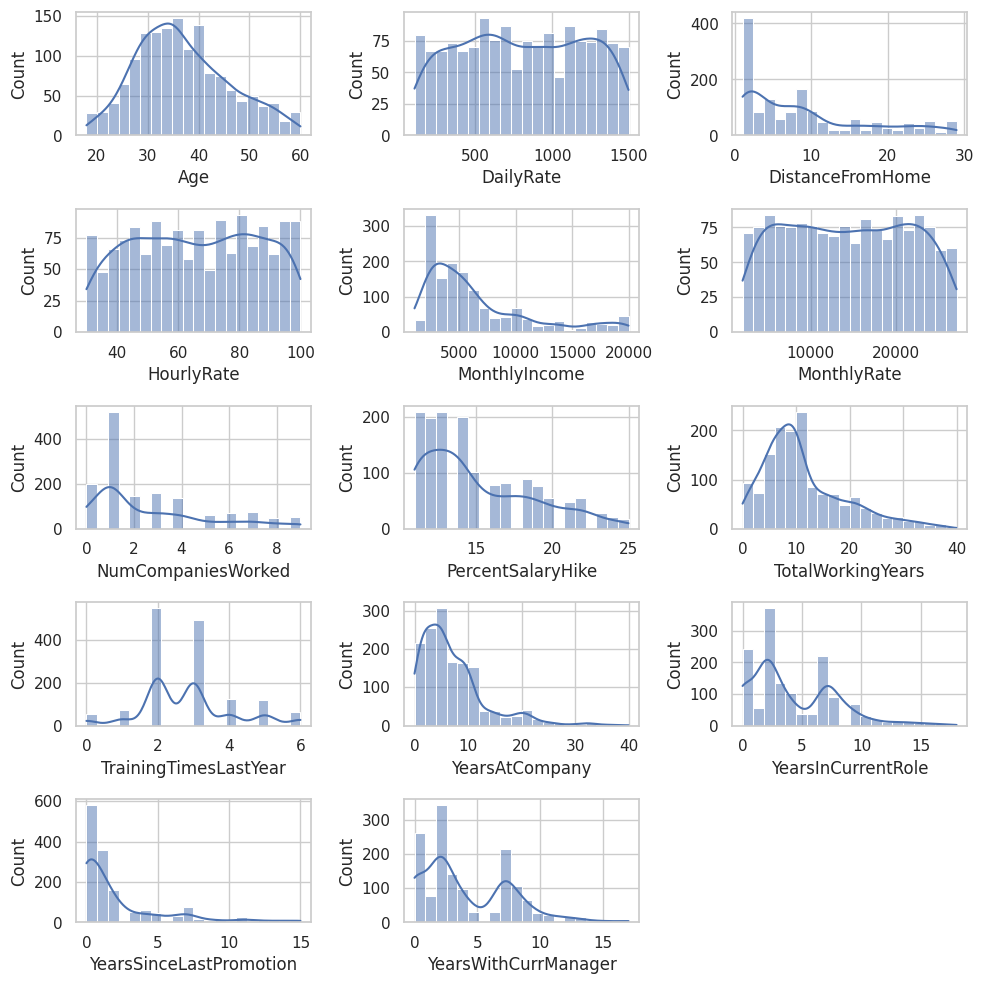

In [55]:
numerical_list1 = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list1, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], bins=20, kde = True)
plt.tight_layout()
plt.show()

##Observations
1. Age: The age feature is normally dsitributed and we can see that most people lie in the age bracket of 30-40 years

2. DailyRate, HourlyRate, MonthlyRate: Here the data is uniformly distributed and  we can see that  it's very consistent that is the frequency of each class is very similar to that of the others.

3. DistanceFromHome: From here, we can notice that most people stay at a short distance from the workplace

4. MonthlyIncome: we can notice that most people earn less than 5000

5. Trainingtimeslastyear: This plot can also show that there where 2-3 tainings last year

6. Numofcompaniesworked: This plot shows that most employees have worked for one company

7. TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager : All these plots a re right skewed and we can also notice that people stay in the company for a short time in all.


Analysis of Rating Features

In [56]:
#Creating new dataframe called ratings with the features below
ratings = data[['EnvironmentSatisfaction','JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','JobInvolvement' ]].copy()

In [57]:
#checking categories in each feature
ratings.nunique()

EnvironmentSatisfaction     4
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
WorkLifeBalance             4
JobInvolvement              4
dtype: int64

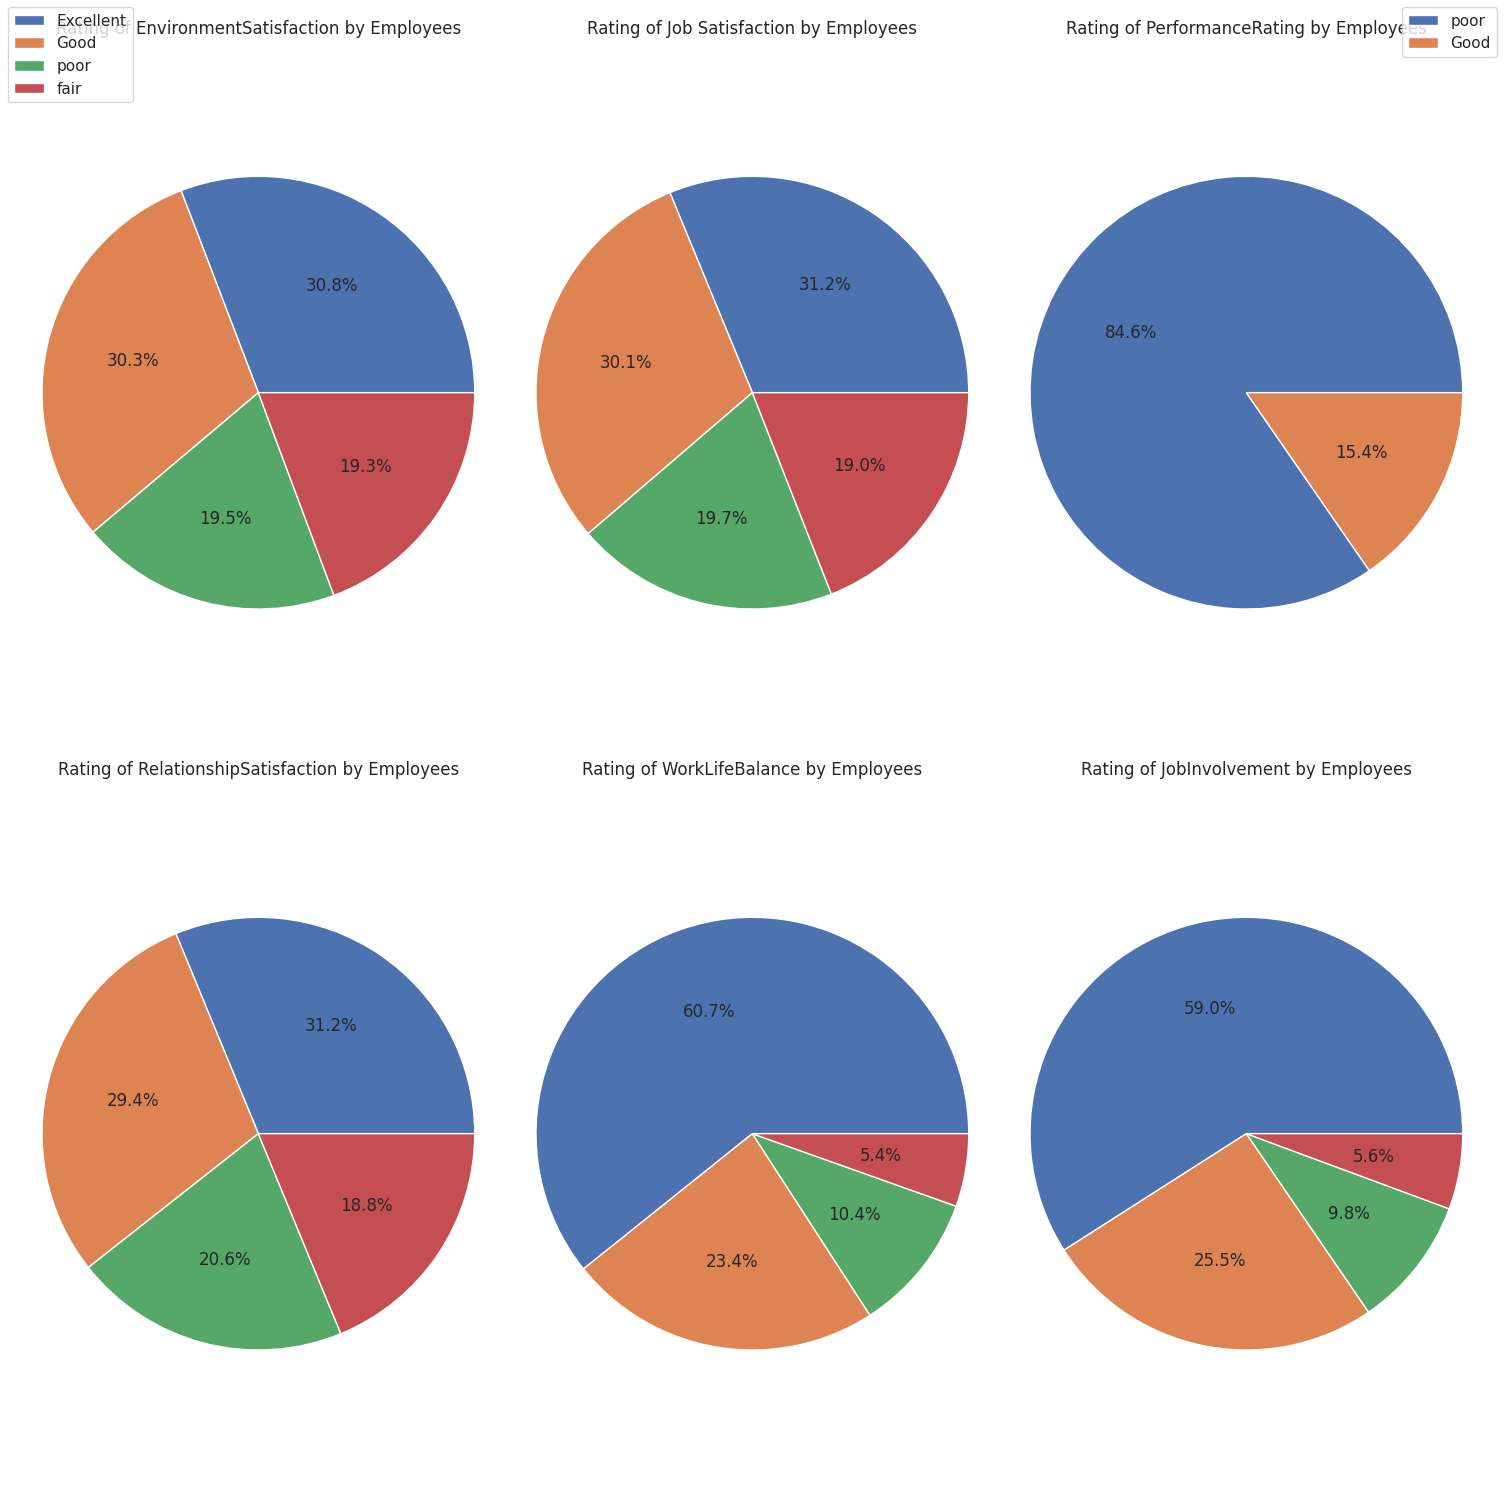

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[0, 2]
ax4 = axes[1, 0]
ax5 = axes[1, 1]
ax6 = axes[1, 2]

ratings['EnvironmentSatisfaction'] = ratings['EnvironmentSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['JobSatisfaction'] = ratings['JobSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['PerformanceRating'] = ratings['PerformanceRating'].replace({3: 'poor', 4: 'Good'})
ratings['RelationshipSatisfaction'] = ratings['RelationshipSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['WorkLifeBalance'] = ratings['WorkLifeBalance'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['JobInvolvement '] = ratings['JobInvolvement'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})




rating_counts1 = ratings['EnvironmentSatisfaction'].value_counts()
b1 = rating_counts1.index
ax1.pie(rating_counts1, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title ('Rating of EnvironmentSatisfaction by Employees')




rating_counts2 = ratings['JobSatisfaction'].value_counts()
b2 = rating_counts2.index
ax2.pie(rating_counts2, autopct='%1.1f%%')
ax2.axis('equal')
fig.legend(labels=b2,loc='upper left')
ax2.set_title ('Rating of Job Satisfaction by Employees')


rating_counts3 = ratings['PerformanceRating'].value_counts()
b3 = rating_counts3.index
ax3.pie(rating_counts3, autopct='%1.1f%%')
ax3.axis('equal')
fig.legend(labels=b3,loc='upper right')
ax3.set_title ('Rating of PerformanceRating by Employees')


rating_counts4 = ratings['RelationshipSatisfaction'].value_counts()
b4 = rating_counts4.index
ax4.pie(rating_counts4, autopct='%1.1f%%')
ax4.axis('equal')
ax4.set_title ('Rating of RelationshipSatisfaction by Employees')


rating_counts5 = ratings['WorkLifeBalance'].value_counts()
b5 = rating_counts5.index
ax5.pie(rating_counts5, autopct='%1.1f%%')
ax5.axis('equal')
ax5.set_title ('Rating of WorkLifeBalance by Employees')


rating_counts6 = ratings['JobInvolvement'].value_counts()
b6 = rating_counts6.index
ax6.pie(rating_counts6, autopct='%1.1f%%')
ax6.axis('equal')
ax6.set_title ('Rating of JobInvolvement by Employees')

plt.tight_layout()
plt.show()




The Ratings of the various attributes by employeess where as follows;
1. EnvironmentalSatisfaction: Over 30% people voted for excellent.
2. JobSatisfaction: 31% people gave an excellent rating about JobSatisfaction at the company.
3.PerformanceRating: 84.6% gave an excellent rating and the remainder gave poor.
4. Relationship Satisfaction: 31.2% gave an excellent rating about the Relationship Satisfaction at the company
5. WorkLifeBalance: 60.7% gave an excellent rating for the WorkLifeBalace at the company
6. JobInvolvement: over 59% voted for excellent JobInvolvement at the company

Data Distribution within the independent variables

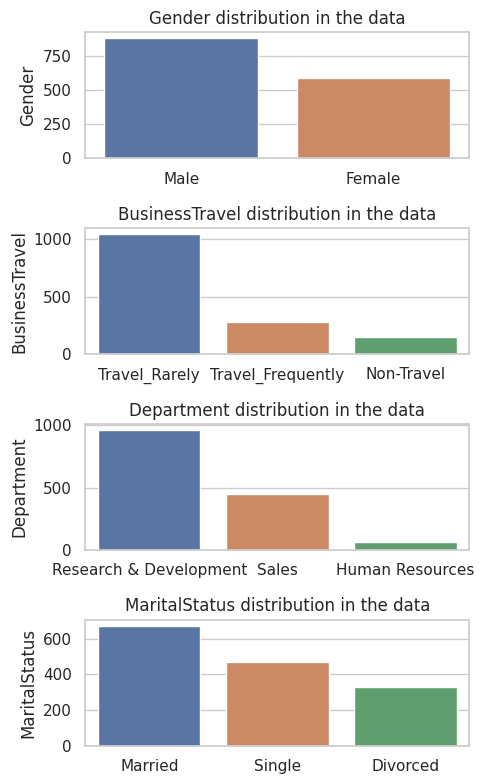

In [59]:
#Data distribution within categories
list = ["Gender", "BusinessTravel", "Department", "MaritalStatus"]

plt.figure(figsize=(5, 8))


for i, column in enumerate(list):
    count = data[column].value_counts()
    plt.subplot(len(list), 1, i + 1)
    plt.xticks()
    plt.title(f'{column} distribution in the data')
    sns.barplot(x=count.index, y=count)

plt.tight_layout()
plt.show()

1. Gender: From the graph we can notice that the majority in the column
2. BusinessTravel: We can also notice thst most people in the company rarely travel
3. Department: Futher more, we can notice that Research& Development has the most people in the organisation
4. MaritalStatus: Most of the people in the oragsnisation are married

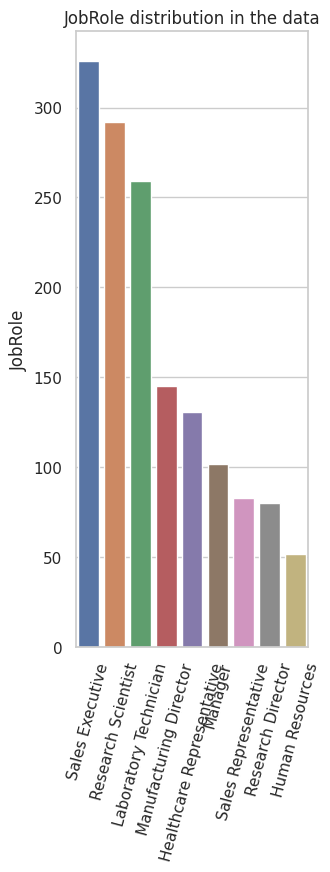

In [60]:
count = data.JobRole.value_counts()
plt.figure(figsize=(3,8))
plt.xticks(rotation=75)
plt.title('JobRole distribution in the data')
sns.barplot(x=count.index, y=count);

we can also notice that Sales Executives is the most has the highest number of people in the company

Cross Analysis between Attrition and Numerical Features

In [61]:
#Checking for columns with numerical data
numerical_features = data.select_dtypes(include = int)
numerical_features.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7


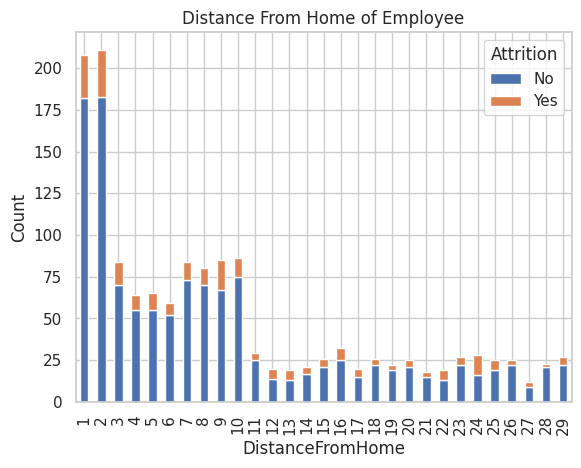

In [62]:
#Plotting stack bars charts for numerical data in relation attrition
dfh= data.groupby('DistanceFromHome')['Attrition'].value_counts().unstack().fillna(0)
sns.set(style='whitegrid')
dfh.plot(kind='bar', stacked=True)
plt.xlabel('DistanceFromHome' )
plt.ylabel('Count')
plt.title('Distance From Home of Employee')
plt.show()

From this graph, we can notice that most people with a short distanceFromHome stay at the company

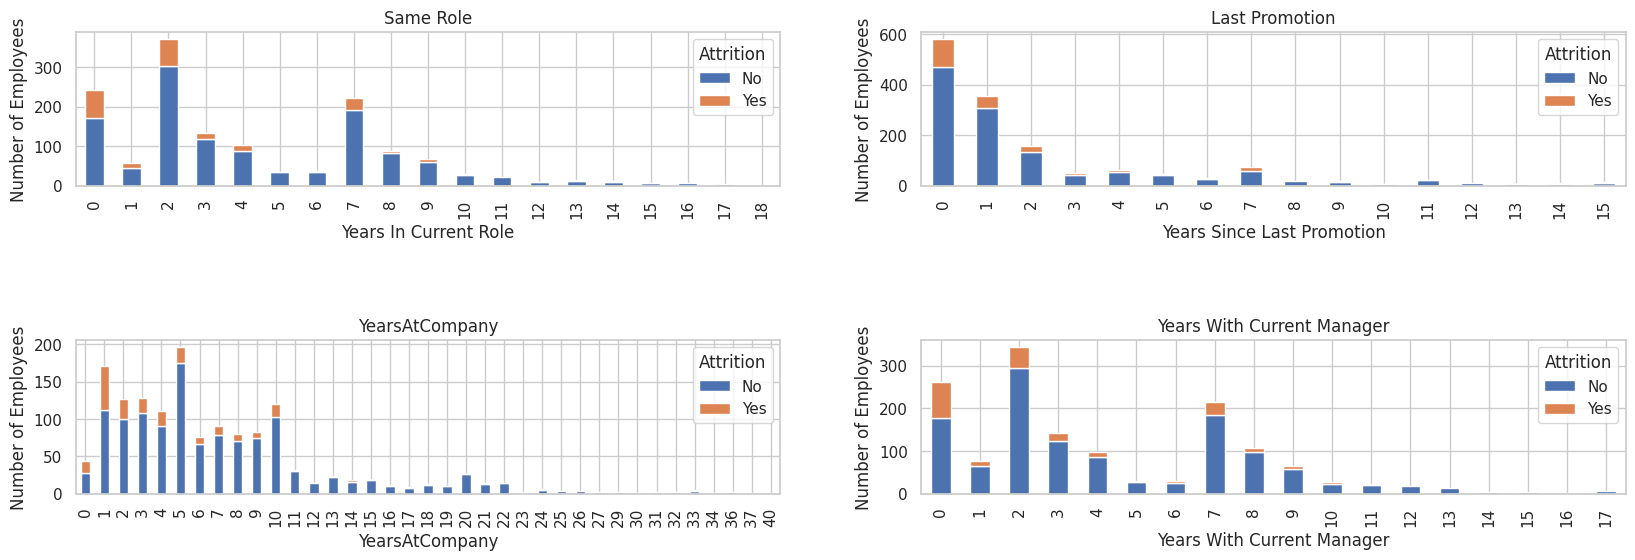

In [63]:
yir = data.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()
yac = data.groupby('YearsAtCompany')['Attrition'].value_counts(normalize=False).unstack()
ywm = data.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

fig = plt.figure()

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# Subplot 1:
yir.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0)
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2:
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1)
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

#subplot 3
yac.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax2)
ax2.set_title('YearsAtCompany')
ax2.set_xlabel('YearsAtCompany')
ax2.set_ylabel('Number of Employees')

#subplot 4
ywm.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax3)
ax3.set_title('Years With Current Manager')
ax3.set_xlabel('Years With Current Manager')
ax3.set_ylabel('Number of Employees')

plt.subplots_adjust(hspace=1)
plt.show()

1. From the graphs above, we can notice that people in same role for over 10 yeas stay at the company.
2. Similary, we can notice that people who stay over 10 years stay at the company.
3. Further more, people usually leave the company within 0-4 years if theres no promotion.

Cross Analysis between Attrition and Categorical Features

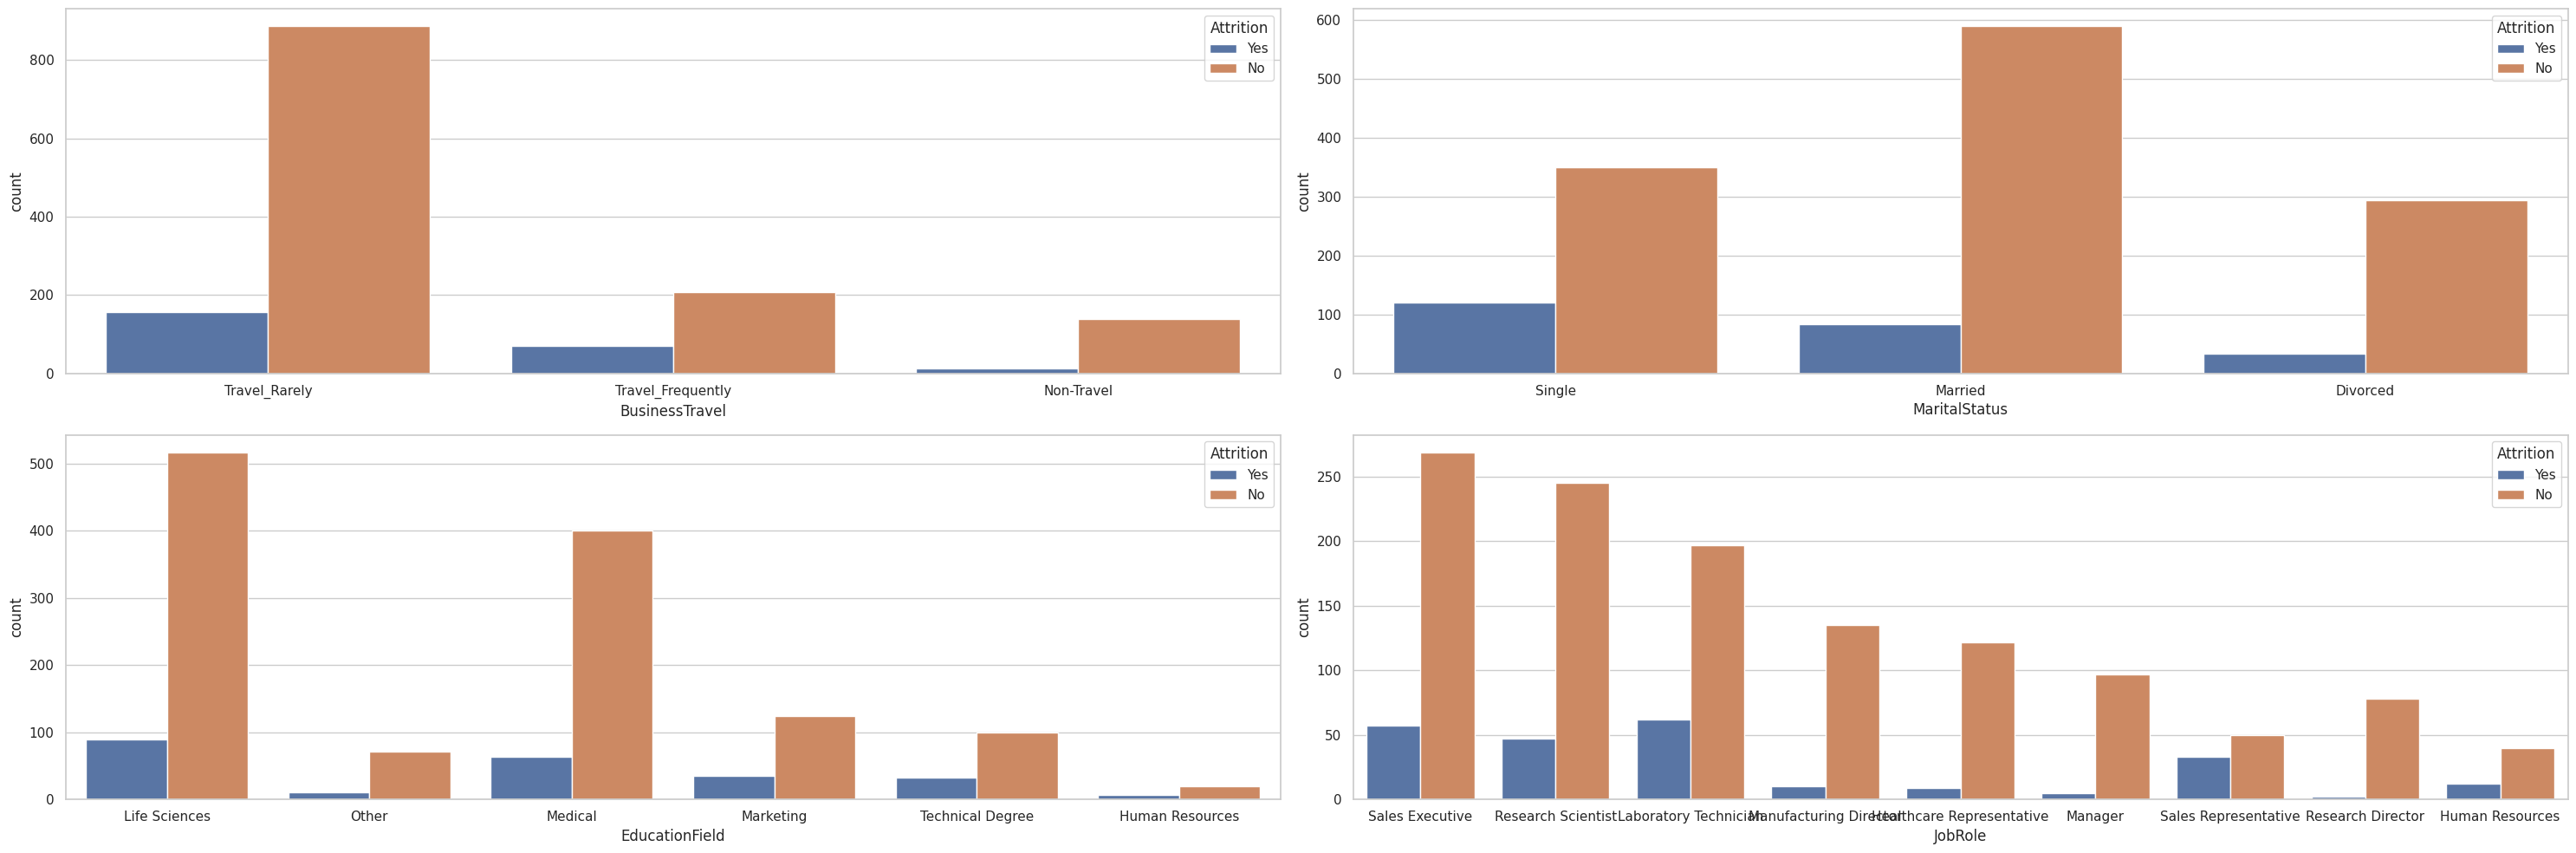

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10))

sns.countplot(data=data, x="BusinessTravel", hue="Attrition", ax=axes[0, 0])
sns.countplot(data=data, x="MaritalStatus", hue="Attrition", ax=axes[0, 1])
sns.countplot(data=data, x="EducationField", hue="Attrition", ax=axes[1, 0])
sns.countplot(data=data, x="JobRole", hue="Attrition", ax=axes[1, 1])

plt.tight_layout()
plt.show()

1. From the graphs above, we can notice that people to travel Rarrely are most likely to leave the company
2. Life Scieces has the highest attrition levels among the other education fields
3. Married people tend to leave the company more compared to other status
4. Prople associated with the sales executive Job role tend to leave the company more

<ipython-input-65-f9c0173f189e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds, annot_kws={"size":7})


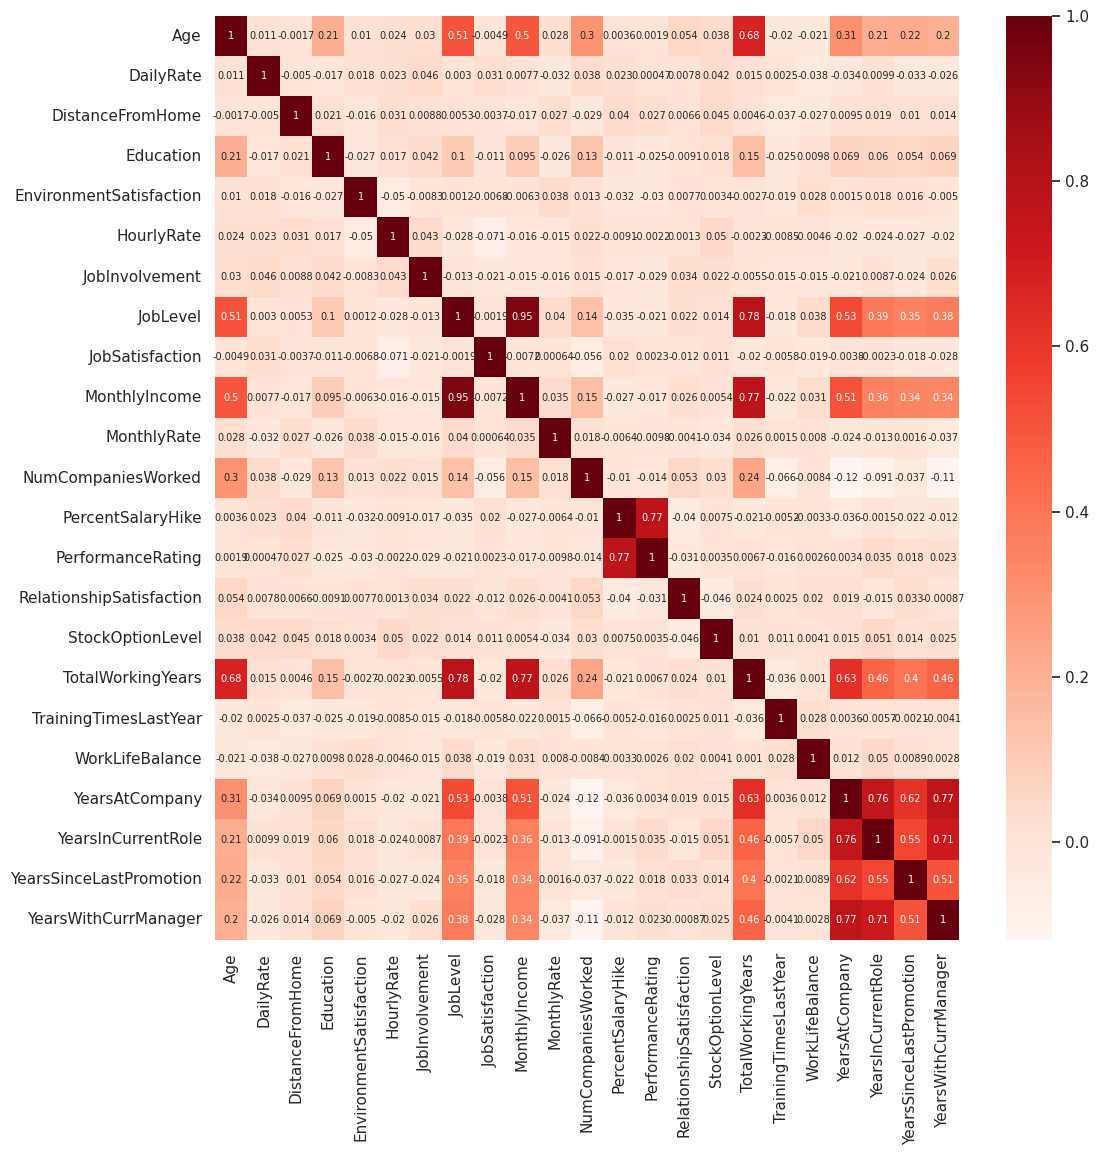

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds, annot_kws={"size":7})
plt.show()

From our findings in the scatterplot above, MonthlyIncome has a strong positive correlation to Joblevel of 0.95. Additionally, Joblevel has a strong positive association with Workingyears (0.78), as well as with YearsInCurrentRole (0.76).

Data Encoding

In encoding , we shall encode the Nominal variables using one hot encoding and the Ordinal variables using Label Encoding

In [66]:
#Creating a list of columns we want to encode
object_columns = ['Attrition','BusinessTravel', 'Gender', 'OverTime']

In [67]:
#importing the label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in object_columns:
    data[column] = le.fit_transform(data[column])

In [68]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
data = pd.get_dummies(data=data, columns=dummies)
display(data.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [69]:
#Getting the target feature(attribution) and storing it in a, and the rest of the features in b
a = data.drop(columns=['Attrition'])  # Features
b= data['Attrition']  # Target variable

In [70]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(a, b)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(a, b)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': a.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
11,MonthlyIncome,127960.782513
12,MonthlyRate,1196.971469
2,DailyRate,961.307134
19,TotalWorkingYears,274.974109
22,YearsAtCompany,169.101678
14,OverTime,158.501524
23,YearsInCurrentRole,156.360899
25,YearsWithCurrManager,147.383845
0,Age,122.331164
46,MaritalStatus_Single,77.378654


In [71]:
#Dropping some features after selection (<0.5)
df = data.drop(columns = ['PerformanceRating', 'JobRole_Research Scientist', 'BusinessTravel'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [72]:
pd.set_option('display.max_columns',None)
df.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [73]:
df.shape

(1470, 45)

Build Model

Feature Scaling

In [74]:
#Splitting the data
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

In [75]:
#creating anew list containing the numerical columns
numerical_list = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'  ]

In [76]:
#splitting  the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_list] = scaler.fit_transform(X_train[numerical_list])
X_test[numerical_list] = scaler.transform(X_test[numerical_list])

In [78]:
#Training the model using Decsion Trees Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
#getting accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[212  33]
 [ 33  16]]


0.7755102040816326

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



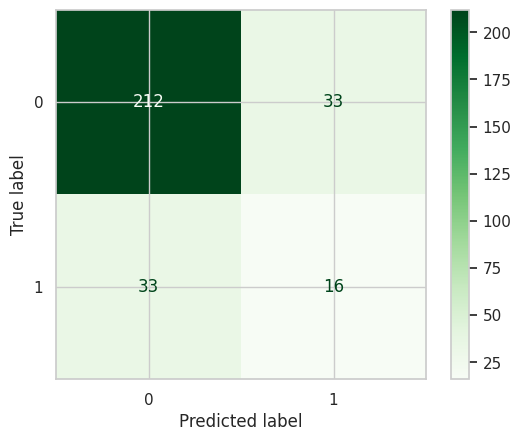

In [81]:
#Printing the classification report and displaying the confusion matrix
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Greens')


From the confusion matrix, we can see that we have 212 true positives and 16 true negatives.

In [82]:
#Perfroming crossvalidatiom
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X =X_train , y= y_train, cv= 10)
print('Accuracy: {:.2f}%' .format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%' .format (accuracies.std()*100))

Accuracy: 80.27%
Standard Deviation: 3.87%


In [83]:
#Finding the best model and parameters using gridsearch
from sklearn.model_selection import GridSearchCV
parameters =[{"criterion": ("gini", "entropy"),
          "splitter": ("best", "random"),
          "max_depth": np.arange(1, 20),
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": np.arange(1, 20)}]

grid_search = GridSearchCV(estimator= classifier, param_grid=parameters, scoring = 'accuracy', cv =10)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 85.46%
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'random'}


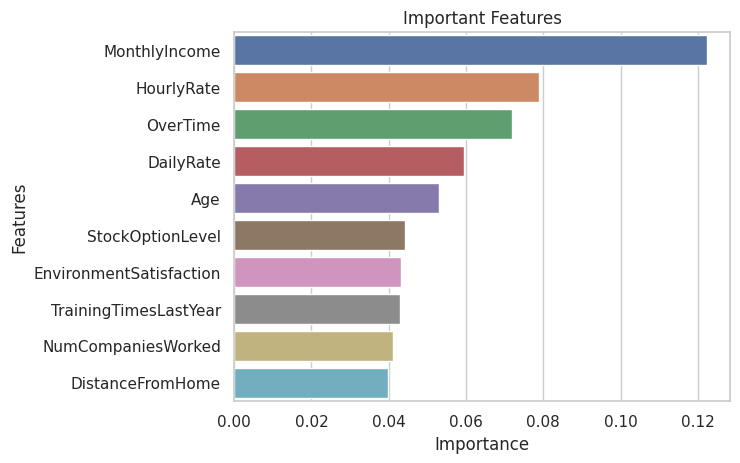

In [87]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": classifier.feature_importances_})
IP = IP.sort_values(by=['Importance'], ascending=False)
#plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.title('Important Features')
plt.show()

In [ ]:
#from imblearn.over_sampling import SMOTE
#oversampler=SMOTE(random_state=0)
#X_train_smote, y_train_smote = oversampler.fit_sample(X_train_select, y_train)

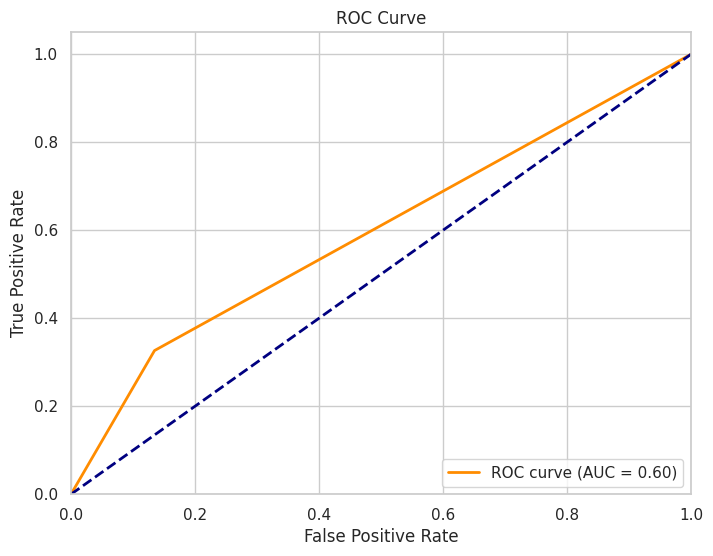

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_scores = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate the AUC-ROC
auc_score = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Conclusion**

In this analysis, we found that 16% of employees left the company in the previous quarter, with more than half leaving from the Research & Development department. Among women, the highest turnover occurred in the Human Resources department. About 1 in every 4 workers with the lowest work-life balance left the company, though the majority of employees who left rated their job satisfaction as good or excellent. Among former employees, salary was found to be significantly lower, with a median monthly income about $2,000/month less than current employees